# World Happiness Report — Exploratory Data Analysis

This notebook explores the World Happiness Report data in two parts:

- **Part A: Historical Dataset (2005–2023)**  
  Annual happiness data for up to 165 countries across 19 years.  
  Key columns: *Life Ladder* (happiness score), *Log GDP per capita*, *Social support*, *Healthy life expectancy*, and other well-being measures.

- **Part B: 2024 Snapshot**  
  Latest cross-sectional data for 143 countries.  
  Includes the *Regional indicator* column (10 world regions), which is not present in the historical dataset.

In [2]:
# === Setup ===
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


/Users/charlotte/Documents/portfolio_project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset from Kaggle

dataset_link = "jainaru/world-happiness-report-2024-yearly-updated" # World Happiness Report 2024
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/world-happiness-report-2024-yearly-updated' already exists with files. Skipping download (replace=False).


In [4]:
# Overview of loaded files
files

['World-happiness-report-2024.csv', 'World-happiness-report-updated_2024.csv']

In [5]:
# Load datasets into dataframes
df_all_years = pd.read_csv("/".join(["../data/raw/", dataset_name, files[1]]), encoding='latin1')
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))

print("Historical (2005–2023):", df_all_years.shape)
print("Snapshot (2024):", df_2024.shape)

Historical (2005–2023): (2363, 11)
Snapshot (2024): (143, 12)


# Part A: Historical Dataset (2005–2023)

In [5]:
# Preview structure
display(df_all_years.head())

# Column info
df_all_years.info()



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


## A.1 Data Quality Checks (2005-2023)

Before analyzing trends, we first check for potential data quality issues:
- Dataset dimensions (rows × columns)  
- Duplicated rows or inconsistent entries  
- Country and year coverage (do we have all expected years per country?)  
- Unusual or impossible values (e.g., negative happiness scores, GDP log values)  

These checks help ensure we are working with clean, reliable data.

In [6]:
# Quality checks 
print(
    "Shape:\t",
    df_all_years.shape,
    "\nNumber of duplicated rows:\t",
    df_all_years.duplicated().sum(),
    "\nNumber of unique countries:\t", 
    df_all_years['Country name'].nunique(),
    "\nYear range:\t", 
    df_all_years['year'].min(), "-", df_all_years['year'].max()
)

# Coverage check: how many years per country
coverage = df_all_years.groupby("Country name")['year'].nunique().describe()
print("\nCoverage:\n", coverage)

pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })

Shape:	 (2363, 11) 
Number of duplicated rows:	 0 
Number of unique countries:	 165 
Year range:	 2005 - 2023

Coverage:
 count    165.000000
mean      14.321212
std        4.798358
min        1.000000
25%       13.000000
50%       16.000000
75%       18.000000
max       18.000000
Name: year, dtype: float64


,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Montenegro, Indonesia, Rwanda]"
year,int64,0,19,"[2009, 2016, 2020]"
Life Ladder,float64,0,1814,"[5.365, 4.72, 7.06]"
Log GDP per capita,float64,28,1760,"[10.666, 9.741, 6.867]"
Social support,float64,13,484,"[0.821, 0.435, 0.893]"
Healthy life expectancy at birth,float64,63,1126,"[nan, 64.9, 68.95]"
Freedom to make life choices,float64,36,550,"[0.896, 0.91, 0.873]"
Generosity,float64,81,650,"[-0.268, 0.216, 0.105]"
Perceptions of corruption,float64,125,613,"[0.877, 0.801, 0.824]"
Positive affect,float64,24,442,"[0.737, 0.556, 0.75]"


### Interpretation
- **Shape:** The dataset has 2363 rows and 11 columns.  
- **Duplicates:** 0 duplicated rows were found (expected = 0).  
- **Coverage:** On average, countries have data for ~14 years (out of max 19). Some countries have gaps (to be inspected in Section A.2 on missingness).    
- **Data types and structure:** All columns have expected data types (numeric vs categorical). Categorical fields like Country name are consistent. Some missing values are present but will be analyzed systematically in Section A.2 (Missingness).

In [7]:
# Summary statistics for numeric columns
display(df_all_years.describe().round(2))

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


### Interpretation
- **Life Ladder:** mean ~5.5, range ~1.3–8.0 → within expected bounds.  
- **Log GDP per capita:** mean ~9.4, range 5.5-11.7 -> corresponds to GDP per capita from <$300 to >$100,000, reasonable.  
- **Healthy life expectancy at birth:** Most values plausible (50–75 years), but the minimum ~6.7 is unrealistic and flagged for further inspection.
- **Generosity:** Ranges -0.34 to 0.70 -> negative values are expected due to standardization around zero.

Overall, distributions align with expectations. Apart from the flagged outlier in life expectancy, no critical data quality issues were found. We now proceed to a systematic missingness analysis.

## A.2 Missingness (2005-2023)

Understanding where and how much data is missing is critical before any analysis.  
We will:

1. Check overall missingness by column.  
2. Explore missingness patterns by year.  
3. Inspect missingness for key predictor columns by country.  

> Note: While *GDP, Social support, Health* are the cleanest key factors,  
> *Generosity* and *Perceptions of corruption* also show non-trivial missingness (~3–5%) and will be monitored in preprocessing.

In [8]:
# Missing values per column
missing_counts = df_all_years.isnull().sum().sort_values(ascending=False)
missing_percentage = (df_all_years.isnull().mean() * 100).sort_values(ascending=False)

pd.DataFrame({
    "Missing values": missing_counts,
    "Missing %": missing_percentage.round(2)
})


,Missing values,Missing %
Perceptions of corruption,125,5.29
Generosity,81,3.43
Healthy life expectancy at birth,63,2.67
Freedom to make life choices,36,1.52
Log GDP per capita,28,1.18
Positive affect,24,1.02
Negative affect,16,0.68
Social support,13,0.55
Country name,0,0.00
year,0,0.00


/var/folders/fh/8172dclx5cz0z2826zl214xc0000gn/T/ipykernel_39114/1853561835.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_year = df_all_years.groupby('year').apply(lambda g: g.isnull().mean())


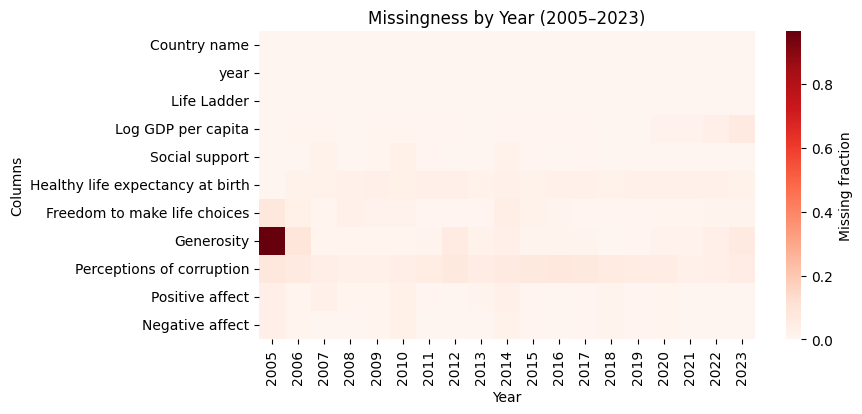

In [40]:
# Share of missing values per year
missing_by_year = df_all_years.groupby('year').apply(lambda g: g.isnull().mean())

plt.figure(figsize=(8,4))
sns.heatmap(missing_by_year.T, cmap="Reds", cbar_kws={"label": "Missing fraction"})
plt.title("Missingness by Year (2005–2023)")
plt.ylabel("Columns")
plt.xlabel("Year")
plt.show()

In [10]:
# Focus on key predictors
cols = ['Log GDP per capita','Social support','Healthy life expectancy at birth']

missing_frac_by_country = (
    df_all_years.groupby('Country name')[cols]
    .apply(lambda g: g.isnull().mean())   # fraction missing per column per country
    .mean(axis=1)                         # average across selected columns
    .sort_values(ascending=False)
)

missing_frac_by_country.head(20)


Country name
Somaliland region            0.666667
State of Palestine           0.375000
Taiwan Province of China     0.354167
Kosovo                       0.352941
Oman                         0.333333
South Sudan                  0.333333
Cuba                         0.333333
Hong Kong S.A.R. of China    0.333333
Qatar                        0.133333
Djibouti                     0.083333
Venezuela                    0.074074
Yemen                        0.047619
Afghanistan                  0.044444
Libya                        0.041667
Algeria                      0.030303
Bahrain                      0.027778
Kuwait                       0.025641
Morocco                      0.025641
Malta                        0.022222
Tunisia                      0.022222
dtype: float64

### Interpretation

- **By column:** Missingness is concentrated in a few variables, with *Perceptions of corruption* (~5%) and *Generosity* (~3%) most affected. Core outcome and predictors (*Life Ladder, GDP, Social support*) are >98% complete, which is reassuring.  

- **By year:** Coverage is weakest in early years (2005–2006), where Generosity data are almost entirely missing. From ~2010 onward, coverage stabilizes and missingness drops below 10% for all major variables.  

- **By country:** Missingness is clustered in specific cases such as Somaliland, Palestine, Taiwan, and Kosovo, reflecting political or data-availability issues. Most other countries have near-complete data.  


### Handling Strategy

- **By column:** Most variables have <5% missingness and can be retained with minimal handling. *Perceptions of corruption* has ~5.3% missing values which is slightly higher but still acceptable. Missing values will be handled case-by-case (e.g., selective imputation or exclusion).  

- **By year:** Years 2005–2006 show extreme gaps, especially for Genorisity data. For trend analyses, we will primarily focus on 2010–2023 where coverage is consistent.  

- **By country:** A few countries (e.g., Somaliland, Palestine, Kosovo) have substantial gaps (>30%). These will be flagged and may be excluded from comparative analyses, while retained in descriptive statistics where possible.   

Overall, missingness is **low and patterned**, not random. We will apply light-touch handling (e.g., selective exclusion, imputation if necessary) without major risk of biasing results.
We can proceed with confidence to deeper trend analyses.

## 3. Distributions & Descriptive Statistics

Before analyzing time trends, it is important to quickly inspect the distributions of key variables.  
This helps identify skewness, potential outliers, or unusual data points that might bias results.

The following plots show the global distributions of:

- **Life Ladder (happiness scores)**  
- **Log GDP per capita**  
- **Social support**  
- **Healthy life expectancy**
- **Freedom to make life choices**
- **Perceptions of corruption**
- **Generosity**


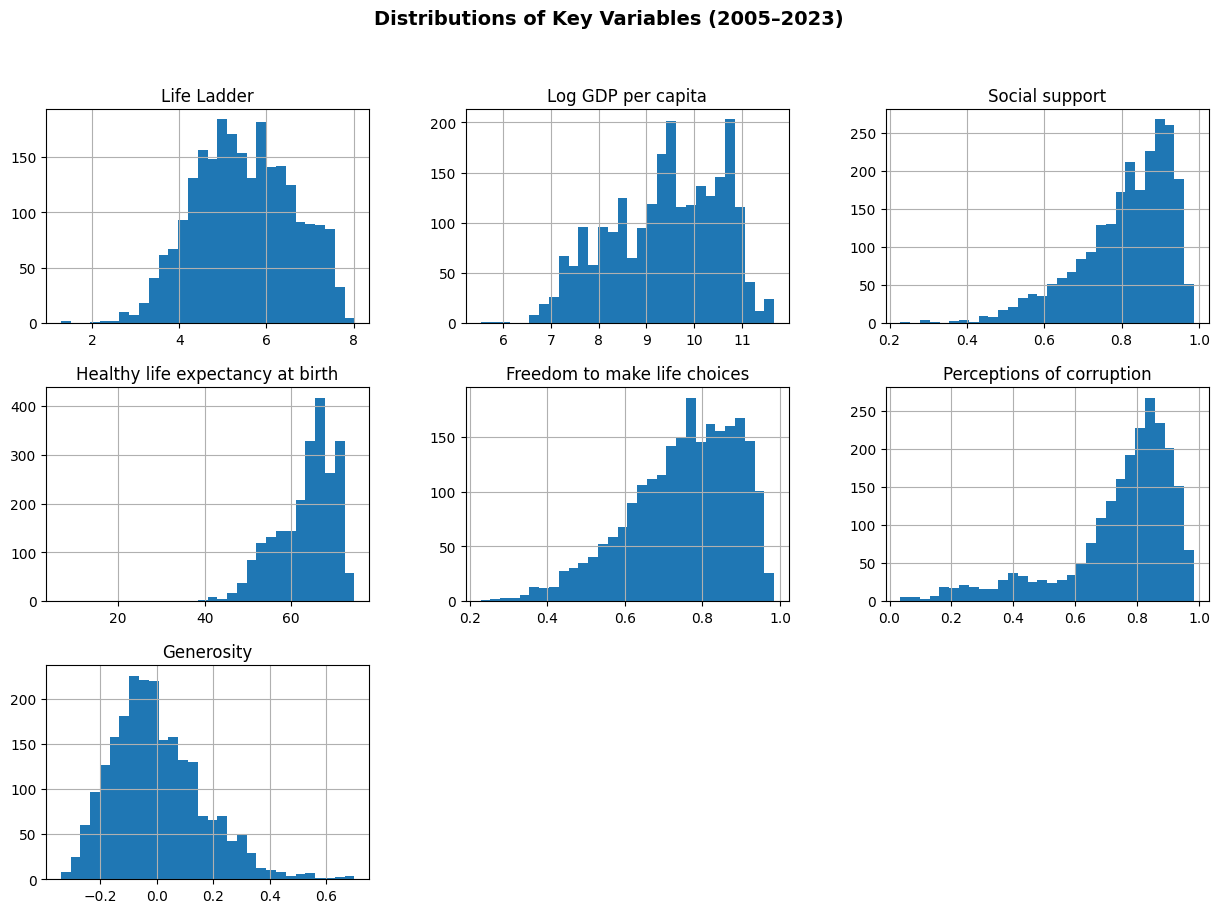

In [8]:
df_all_years[['Life Ladder', 'Log GDP per capita', 'Social support', 
         'Healthy life expectancy at birth', 'Freedom to make life choices', 'Perceptions of corruption','Generosity']].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distributions of Key Variables (2005–2023)', fontsize=14, fontweight='bold')
plt.show()


#### Interpretation – Distributions of Key Variables (2005–2023)

- **Life Ladder (happiness score)**  
  Roughly bell-shaped, centered between **4 and 6**. Most countries cluster in the mid-range, while very high (>7) and very low (<3) scores are rare. This suggests global variation exists but extreme cases are uncommon.  

- **Log GDP per capita**  
  Slightly right-skewed, with most values between **8 and 11**. Reflects wide economic differences, but very low GDP (<7) is rare, indicating that most countries in the dataset are middle- or high-income.  

- **Social support**  
  Strong skew toward the upper end (0.8–1.0). High levels of reported social support are the global norm, with only a small share of countries reporting weak support networks.  

- **Healthy life expectancy at birth**  
  Concentrated between **55 and 70 years**. Distribution is narrower than other predictors, reflecting a more limited global spread. Outliers with very low values exist but are rare.  

- **Freedom to make life choices**  
  Right-skewed, with most countries between **0.6 and 0.9**. Suggests that many respondents feel relatively free, with only a minority in restrictive contexts.  

- **Perceptions of corruption**  
  Peaks near **0.7–0.9**, meaning most respondents perceive relatively high corruption levels. Very low corruption perceptions (<0.3) are rare, indicating that **trust in institutions is limited globally**.  

- **Generosity**  
  Centered around **0**, with both negative and positive values. Indicates that generosity is a weakly defined construct here — some countries report slightly negative averages, others moderately positive. Much more dispersed than the other predictors.  

#### Key Takeaways
- Most predictors show **skewed distributions** (e.g., corruption, social support, freedom) rather than symmetric bell curves.  
- **Life Ladder** itself is fairly symmetric, showing that most countries sit around mid-level happiness.  
- Variables like **social support and corruption** are heavily concentrated at the extremes, which may limit their explanatory power globally.  
- **Generosity** stands out as noisy and weakly distributed, suggesting it might not be a strong predictor of happiness.  


## A.4 Time Trends (2005–2023)

In this section, we analyze how happiness and its key predictors evolved over time.  
Before looking at global averages or trends in predictors, it is important to understand the **data coverage** across years, since early years or specific periods may have fewer countries represented. This directly impacts how robust the observed global patterns are.

### Data Coverage Over Time

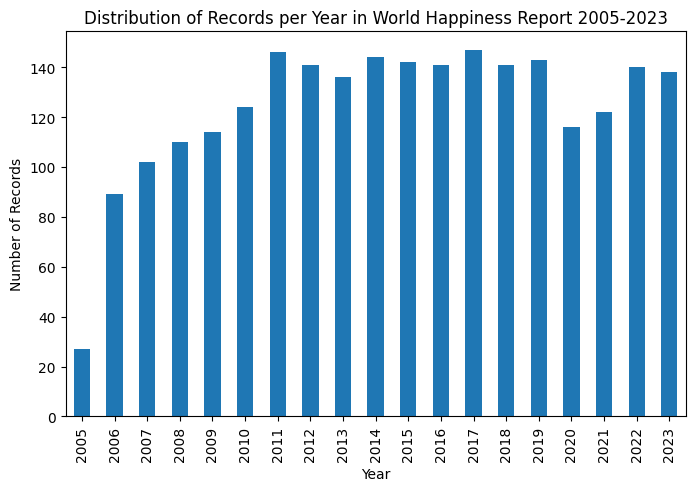

In [11]:
# Distribution of Records per Year
plt.figure(figsize=(8,5))
df_all_years['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Records per Year in World Happiness Report 2005-2023')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()

#### Interpretation – Data Coverage
The dataset shows strong variation in the number of countries represented across years.  
- **2005** stands out with only **27 records**, compared to over 100 in later years. This extremely small coverage makes 2005 non-representative and unsuitable for meaningful global trend analysis.  
- From **2006 onwards**, the number of countries stabilizes around 110–150, ensuring much more reliable coverage.  
- A noticeable dip occurs in **2020–2021**, likely reflecting data collection challenges during the COVID-19 pandemic.  

For the following analysis, 2005 is excluded from interpretations to avoid bias from this early, limited sample.

### Global Happiness Over Time

1. **Top panel:** The global **mean** and **median** Life Ladder across countries, allowing us to see broad trends and differences between mean and median.  

2. **Bottom panel:** The full **distribution of Life Ladder scores** across countries each year, using boxplots. This highlights variation between countries, potential outliers, and whether changes in averages reflect shifts across the entire distribution or are driven by specific cases.



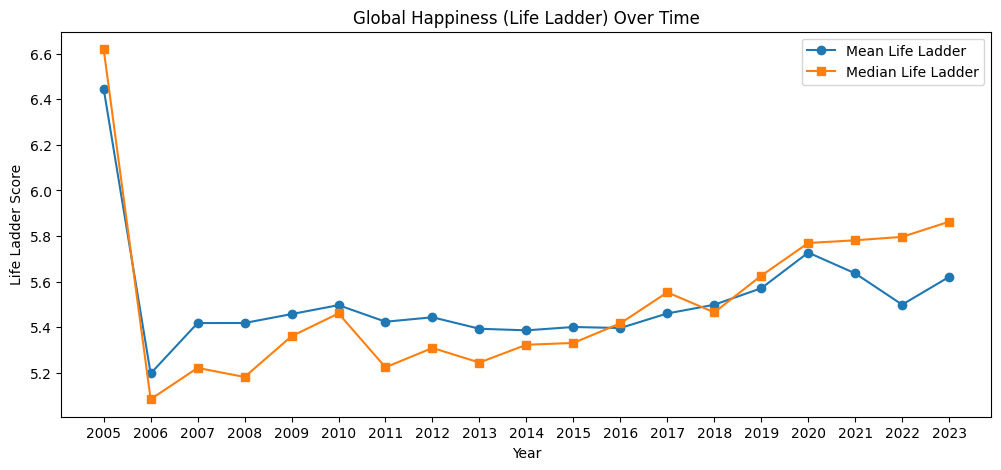

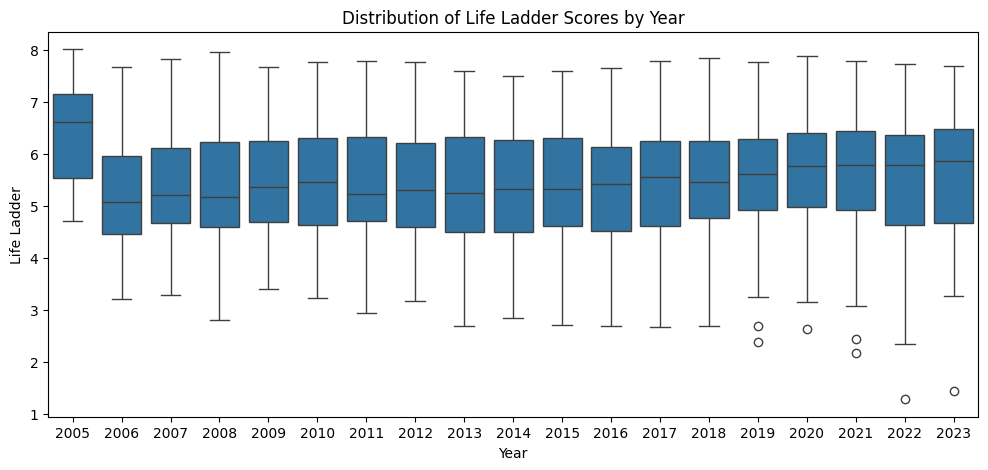

In [36]:
# Mean and median Life Ladder over time
mean_life = df_all_years.groupby('year')['Life Ladder'].mean()
median_life = df_all_years.groupby('year')['Life Ladder'].median()

plt.figure(figsize=(12,5))
plt.plot(mean_life.index, mean_life.values, marker='o', label='Mean Life Ladder')
plt.plot(median_life.index, median_life.values, marker='s', label='Median Life Ladder')
plt.title('Global Happiness (Life Ladder) Over Time')
plt.xlabel('Year')
plt.ylabel('Life Ladder Score')
plt.xticks(mean_life.index.astype(int))  # ensure integer years on x-axis
plt.legend()
plt.show()

# Boxplot of Life Ladder scores per year
plt.figure(figsize=(12,5))
sns.boxplot(x='year', y='Life Ladder', data=df_all_years)
plt.title('Distribution of Life Ladder Scores by Year')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

#### Interpretation – Global Happiness Over Time
When focusing on **2006–2023**, several patterns emerge:  
- **2006–2015**: Global happiness is relatively stable, fluctuating narrowly around **5.2–5.4**. Mean and median values align closely, suggesting a balanced distribution.  
- **2016–2019**: A mild upward drift occurs, with mean happiness reaching **5.57** and median **5.63** by 2019.  
- **2020–2021 (COVID years)**: Counterintuitively, average happiness **increased** (mean 5.73, median 5.78). This resilience may be linked to strong social support systems, which are also reflected in the predictors.  
- **2022 dip, 2023 rebound**: Mean happiness drops to **5.50** in 2022, before rebounding to **5.62** in 2023. Interestingly, the median keeps rising to 5.86, while the mean stays lower. This suggests that more countries are moving closer to the middle range of happiness scores, instead of the gap between countries getting bigger.

The accompanying boxplot confirms this: distributions tighten in later years, indicating reduced dispersion in happiness scores across countries.

### Trends in Key Predictors
Next, we explore the global averages of the main predictors.  
To better account for differences in scale, we split the predictors into four plots:  
1. *Healthy life expectancy at birth* (60–70 years)  
2. *Log GDP per capita* (8–11, logarithmic units)  
3. *Social support, Freedom to make life choices, Perceptions of corruption* (0–1 scale)  
4. *Generosity* (-0.4-0.7 scale)

This separation allows us to see meaningful changes over time in each group without flattening smaller-scale variables.


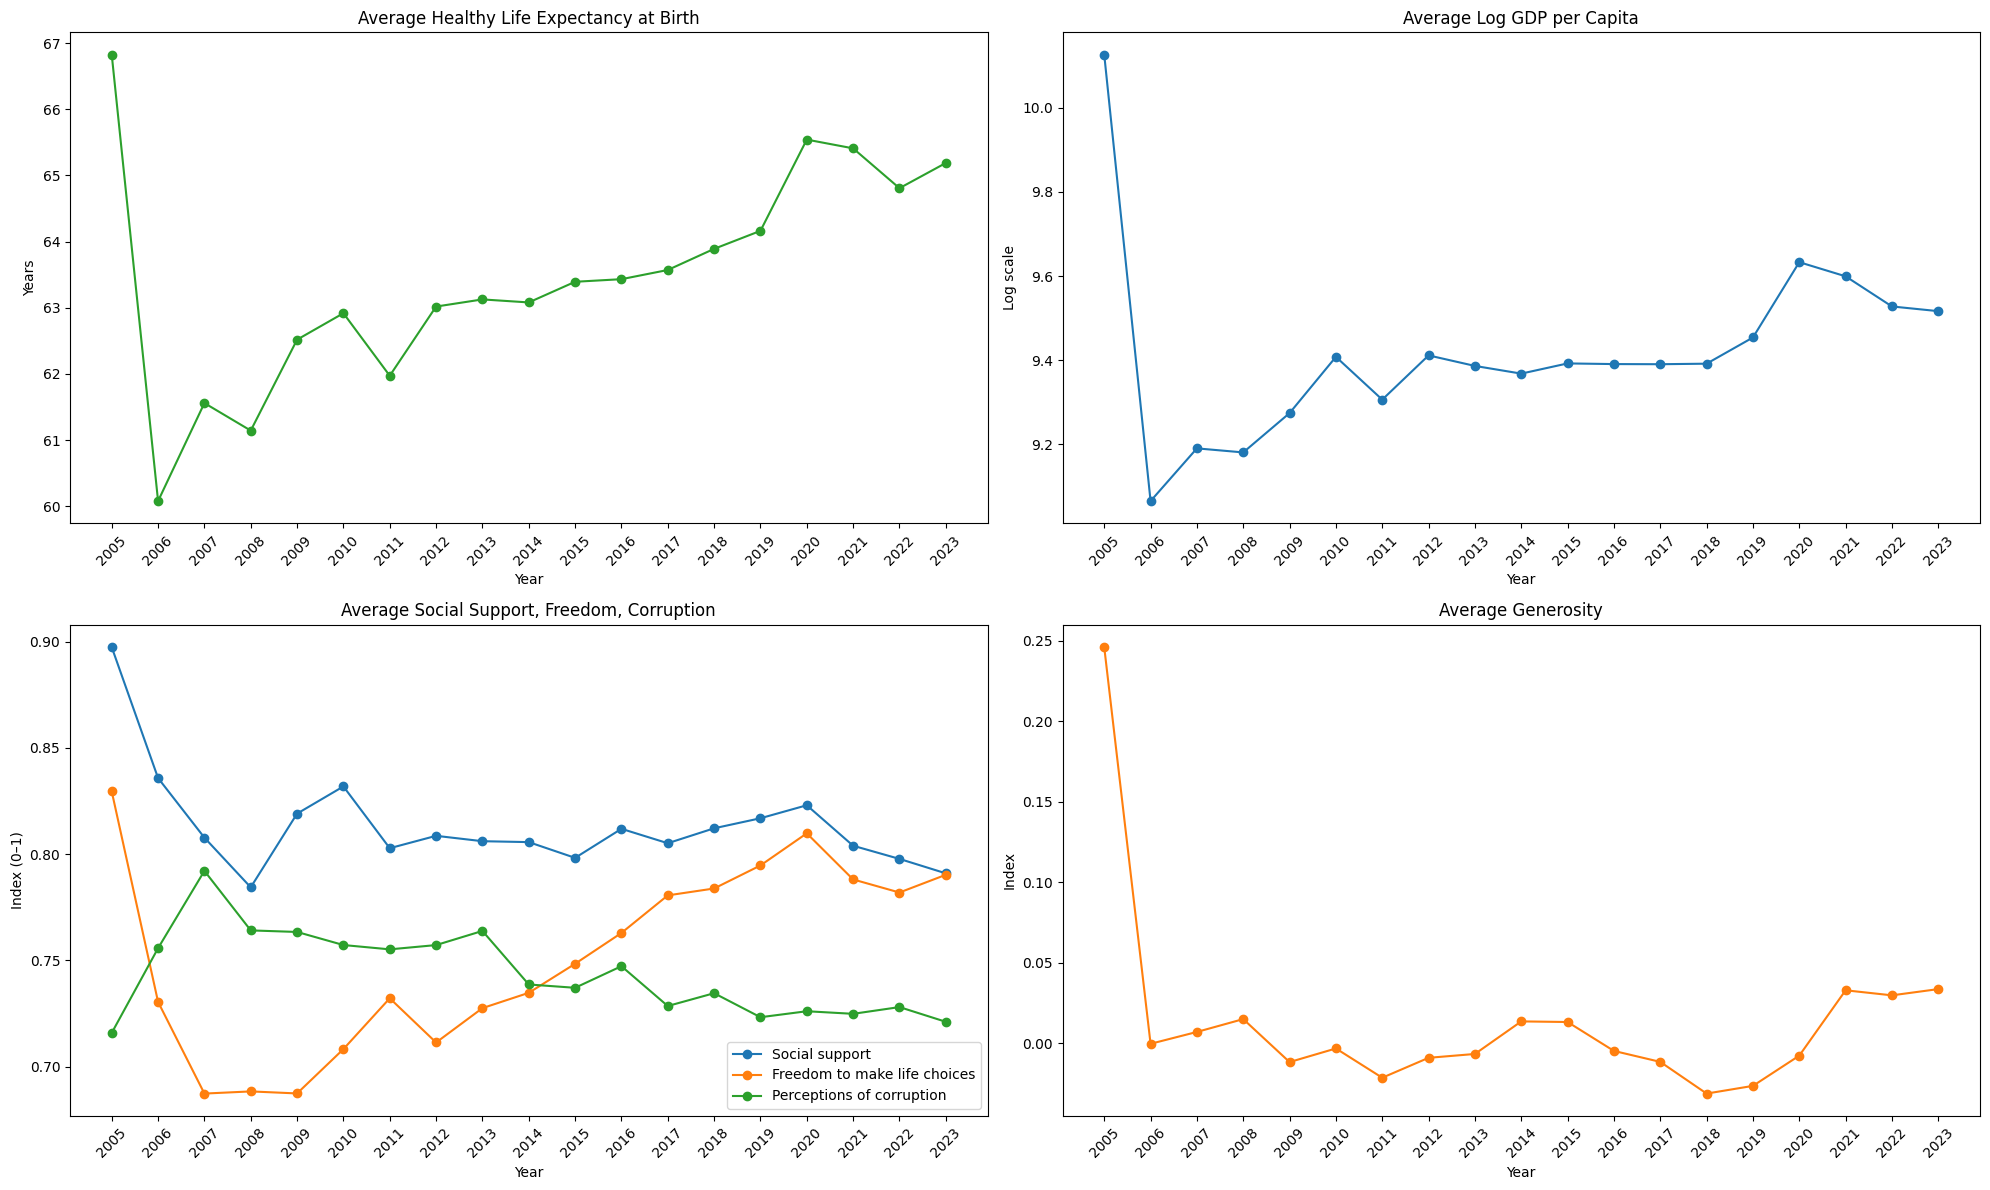

In [17]:
# Create subplots for key predictors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# 1. Healthy life expectancy
df_all_years.groupby("year")["Healthy life expectancy at birth"].mean().plot(
    ax=axes[0, 0], marker="o", color="tab:green"
)
axes[0, 0].set_title("Average Healthy Life Expectancy at Birth")
axes[0, 0].set_ylabel("Years")

# 2. Log GDP per capita
df_all_years.groupby("year")["Log GDP per capita"].mean().plot(
    ax=axes[0, 1], marker="o", color="tab:blue"
)
axes[0, 1].set_title("Average Log GDP per Capita")
axes[0, 1].set_ylabel("Log scale")

# 3. Social support, Freedom, Corruption
df_all_years.groupby("year")[["Social support", "Freedom to make life choices", "Perceptions of corruption"]].mean().plot(
    ax=axes[1, 0], marker="o"
)
axes[1, 0].set_title("Average Social Support, Freedom, Corruption")
axes[1, 0].set_ylabel("Index (0–1)")
axes[1, 0].legend(loc="lower right")

# 4. Generosity
df_all_years.groupby("year")["Generosity"].mean().plot(
    ax=axes[1, 1], marker="o", color="tab:orange"
)
axes[1, 1].set_title("Average Generosity")
axes[1, 1].set_ylabel("Index")

# Format x-axis (years as integers, every year shown)
for ax in axes.flat:
    ax.set_xlabel("Year")
    ax.set_xticks(sorted(df_all_years["year"].unique()))
    ax.set_xticklabels(sorted(df_all_years["year"].unique()), rotation=45)

plt.tight_layout()
plt.show()


#### Interpretation – Trends in Key Predictors
The key predictors of happiness provide context for the observed trends:  
- **Healthy life expectancy**: Increased steadily from ~60 years (2006) to ~65+ in the 2020s, supporting higher well-being.  

- **Log GDP per capita**: Recovered after the 2006 dip and grew steadily until 2019. Some volatility is visible from 2020–2023, but overall levels remain high compared to earlier years.  

- **Social support**: Consistently strong around 0.8, with only minor fluctuations, likely acting as a buffer during shocks such as COVID-19.  

- **Freedom to make life choices**: Declined to ~0.69 in 2007–08 but improved steadily thereafter, reaching ~0.79 by 2023. This improvement aligns with rising median happiness. 

- **Perceptions of corruption**: peaked in the mid-2000s (worse perceptions) and then declined from that peak toward recent years, indicating some improvement relative to the 2007 high.

- **Generosity**: Long-term decline from positive values in the mid-2000s to mostly negative in the 2010s, with a small rebound after 2020. This suggests shifting cultural or economic constraints, though the effect is weaker compared to other predictors.  

### Regional Time Trends (Placeholder)
Regional time trends will be explored once regions are mapped consistently in preprocessing.  
This will allow us to compare long-term happiness trajectories across world regions.


### Section Summary
From 2006 onward, the World Happiness Report dataset provides consistent and reliable coverage. Global happiness has remained **remarkably stable**, with **gradual improvements since 2015** and surprising resilience during the COVID-19 years. Gains in **life expectancy** and **freedom**, along with strong **social support**, appear to have supported well-being despite global shocks. At the same time, **corruption perceptions remain stagnant** and **generosity has declined**, highlighting persistent institutional and societal challenges.  

Overall, the trends suggest that while structural well-being factors have improved, global inequalities and trust-related issues continue to shape differences in happiness across countries.


## A.5 Correlations (2005-2023)

To understand how the key predictors relate to happiness (Life Ladder), we compute pairwise correlations.  
This provides a first look at **which factors are most strongly associated with happiness** and highlights possible redundancies among predictors.

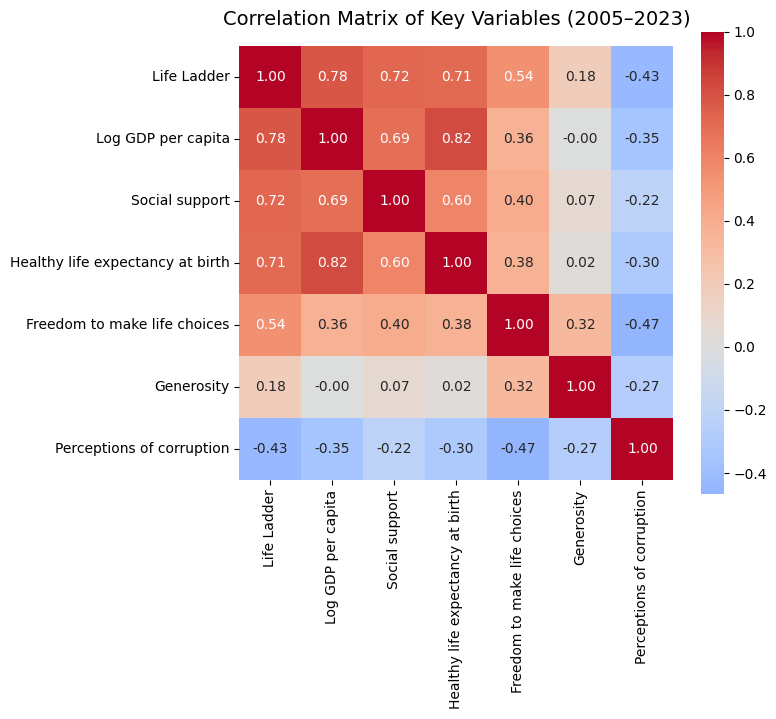

In [13]:
# Select relevant columns
corr_cols = [
    'Life Ladder',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

corr_matrix = df_all_years[corr_cols].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Key Variables (2005–2023)', fontsize=14, pad=15)
plt.show()


#### Interpretation – Correlations

- **Strong positive correlations** with happiness: GDP, social support, life expectancy, freedom (weakest out of the 4 predictors).  
- **Weak/unstable correlations**: Generosity (noisy, little explanatory power).  
- **Negative correlation**: Perceptions of corruption (higher corruption = lower happiness).  
- Some predictors are also intercorrelated (e.g., GDP with life expectancy, social support).  

These patterns will help refine which predictors are most robust for explaining happiness in later analyses.


## A.6 Hypothesis-Relevant Explorations (2005-2023) (Placeholder)

## A.7 Summary of Historical Dataset (Placeholder)

## Part B: 2024 Snapshot

In [19]:
# Preview structure
display(df_2024.head())

# Column info
df_2024.info()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [20]:
print('Data 2005-2023:')
display(
    "Shape",
    df_all_years.shape,
    "Description",
    df_all_years.describe().round(2),
    "Duplicates",
    df_all_years.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_all_years.dtypes,
        "Missing Values": df_all_years.isnull().sum(),
        "Unique Values": df_all_years.nunique(),
        "Sample Values": [df_all_years[col].sample(3).tolist() for col in df_all_years.columns]
    })


Data 2005-2023:


'Shape'

(2363, 11)

'Description'

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.00,2363.00,2335.00,2350.00,2300.00,2327.00,2282.00,2238.00,2339.00,2347.00
mean,2014.76,5.48,9.40,0.81,63.40,0.75,0.00,0.74,0.65,0.27
std,5.06,1.13,1.15,0.12,6.84,0.14,0.16,0.18,0.11,0.09
min,2005.00,1.28,5.53,0.23,6.72,0.23,-0.34,0.04,0.18,0.08
25%,2011.00,4.65,8.51,0.74,59.20,0.66,-0.11,0.69,0.57,0.21
50%,2015.00,5.45,9.50,0.83,65.10,0.77,-0.02,0.80,0.66,0.26
75%,2019.00,6.32,10.39,0.90,68.55,0.86,0.09,0.87,0.74,0.33
max,2023.00,8.02,11.68,0.99,74.60,0.98,0.70,0.98,0.88,0.70


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,165,"[Kazakhstan, Germany, Iceland]"
year,int64,0,19,"[2014, 2021, 2006]"
Life Ladder,float64,0,1814,"[6.456, 5.22, 3.816]"
Log GDP per capita,float64,28,1760,"[10.209, 8.902, 9.14]"
Social support,float64,13,484,"[0.509, 0.89, 0.893]"
Healthy life expectancy at birth,float64,63,1126,"[65.28, 73.2, 61.725]"
Freedom to make life choices,float64,36,550,"[0.773, 0.886, 0.794]"
Generosity,float64,81,650,"[-0.017, -0.214, -0.067]"
Perceptions of corruption,float64,125,613,"[0.962, 0.362, 0.911]"
Positive affect,float64,24,442,"[0.525, 0.484, 0.526]"


Insights:
- High count of missing values in columns: Perceptions of corruption, Generosity, Healthy life expectancy at birth
- No missing values in column "Life Ladder" -> excellent, since this will be the target variable
- Columns "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect" are of low importance (low correlation with target variable), decision to just keep those missing values
- Columns "Log GDP per capita", "Social support", "Healthy life expectancy at birth" are of high importance. Those missing values will be handled with interpolation to ensure high quality of further analysis. The World Happiness Report mentiones that the method of inter- and extrapolation was also used to fill missing values of these columns in the 2024 report.

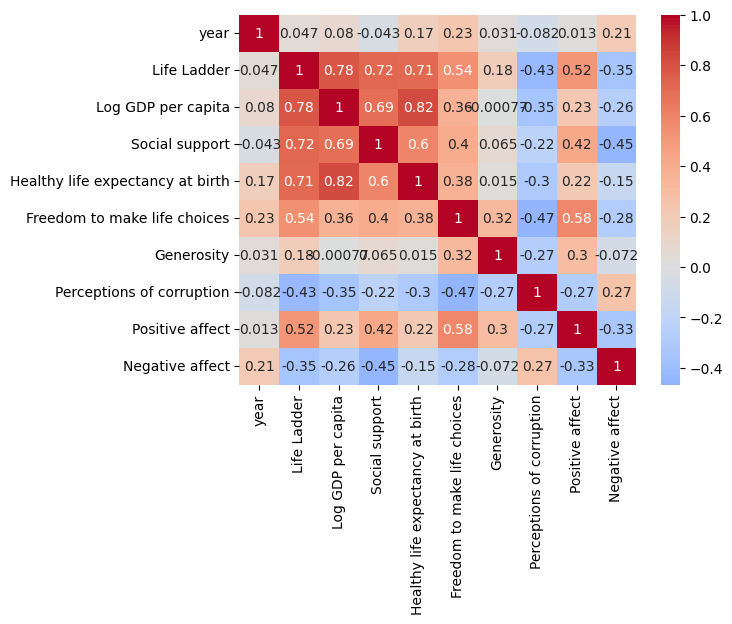

In [21]:
sns.heatmap(df_all_years.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>],
       [<Axes: title={'center': 'Negative affect'}>, <Axes: >, <Axes: >]],
      dtype=object)

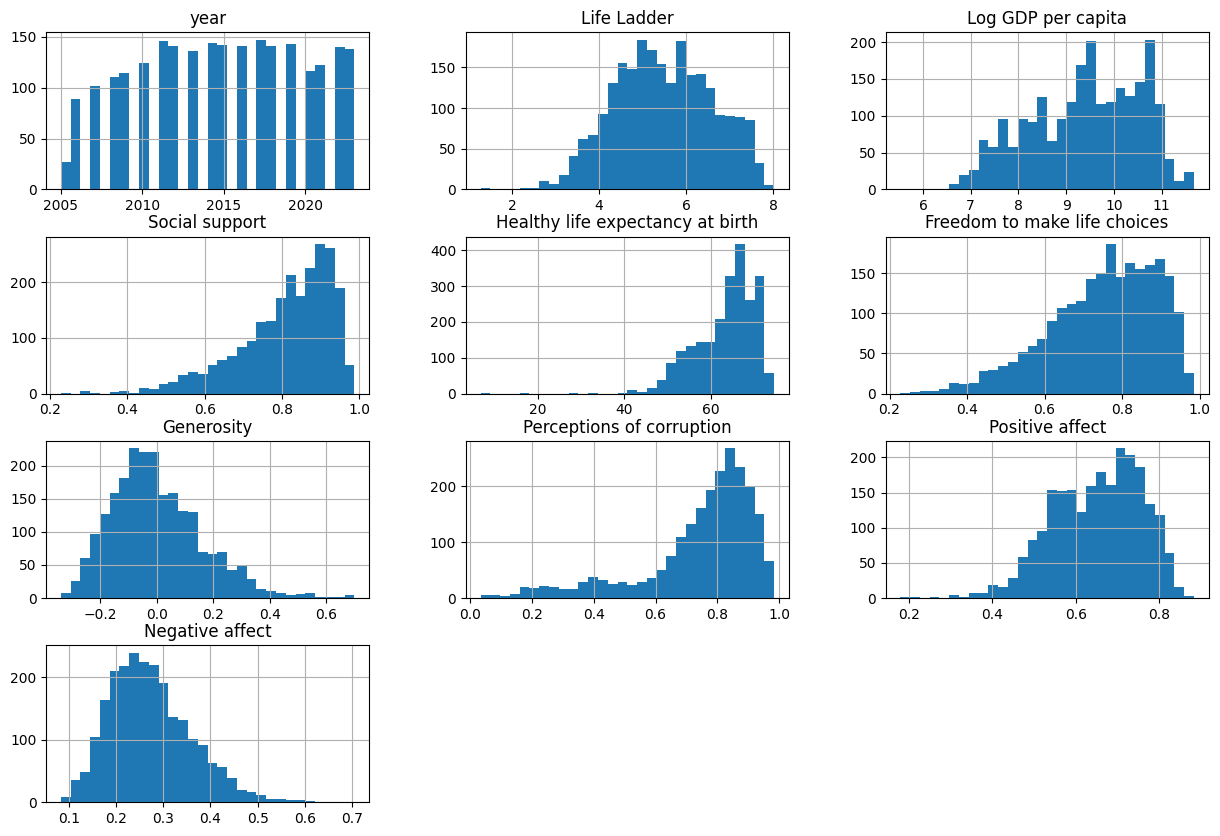

In [22]:
print('Distribution of Numerical Features:')
df_all_years.hist(figsize=(15, 10), bins=30)

Exploration: Current Data 2024

In [23]:
df_2024 = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
print('Data 2024:')
display(df_2024.head())

Data 2024:


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [24]:
print('Data 2024:')
display(
    "Shape",
    df_2024.shape,
    "Description",
    df_2024.describe().round(2),
    "Duplicates",
    df_2024.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_2024.dtypes,
        "Missing Values": df_2024.isnull().sum(),
        "Unique Values": df_2024.nunique(),
        "Sample Values": [df_2024[col].sample(3).tolist() for col in df_2024.columns]
    })


Data 2024:


'Shape'

(143, 12)

'Description'

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.00,143.00,143.00,140.00,140.00,140.00,140.00,140.00,140.00,140.00
mean,5.53,5.64,5.41,1.38,1.13,0.52,0.62,0.15,0.15,1.58
std,1.17,1.16,1.19,0.43,0.33,0.16,0.16,0.07,0.13,0.54
min,1.72,1.78,1.67,0.00,0.00,0.00,0.00,0.00,0.00,-0.07
25%,4.73,4.85,4.61,1.08,0.92,0.40,0.53,0.09,0.07,1.31
50%,5.78,5.90,5.67,1.43,1.24,0.55,0.64,0.14,0.12,1.64
75%,6.42,6.51,6.32,1.74,1.38,0.65,0.74,0.19,0.19,1.88
max,7.74,7.82,7.67,2.14,1.62,0.86,0.86,0.40,0.57,3.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Country name,object,0,143,"[Spain, Mexico, United Arab Emirates]"
Regional indicator,object,0,10,"[Sub-Saharan Africa, Middle East and North Afr..."
Ladder score,float64,0,140,"[5.841, 3.977, 4.795]"
upperwhisker,float64,0,140,"[5.283, 6.961, 6.306]"
lowerwhisker,float64,0,136,"[4.208, 6.07, 5.91]"
Log GDP per capita,float64,3,134,"[1.786, 1.037, 1.213]"
Social support,float64,3,124,"[1.328, 1.277, 1.269]"
Healthy life expectancy,float64,3,119,"[0.64, 0.729, 0.542]"
Freedom to make life choices,float64,3,122,"[0.592, 0.58, 0.547]"
Generosity,float64,3,110,"[0.089, 0.045, 0.024]"


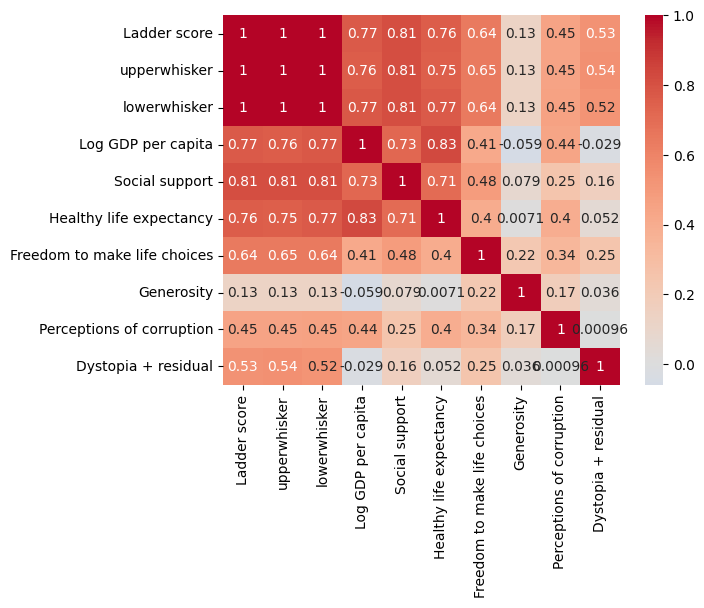

In [25]:
sns.heatmap(df_2024.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

Distribution of Numerical Features:


array([[<Axes: title={'center': 'Ladder score'}>,
        <Axes: title={'center': 'upperwhisker'}>,
        <Axes: title={'center': 'lowerwhisker'}>],
       [<Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>],
       [<Axes: title={'center': 'Dystopia + residual'}>, <Axes: >,
        <Axes: >]], dtype=object)

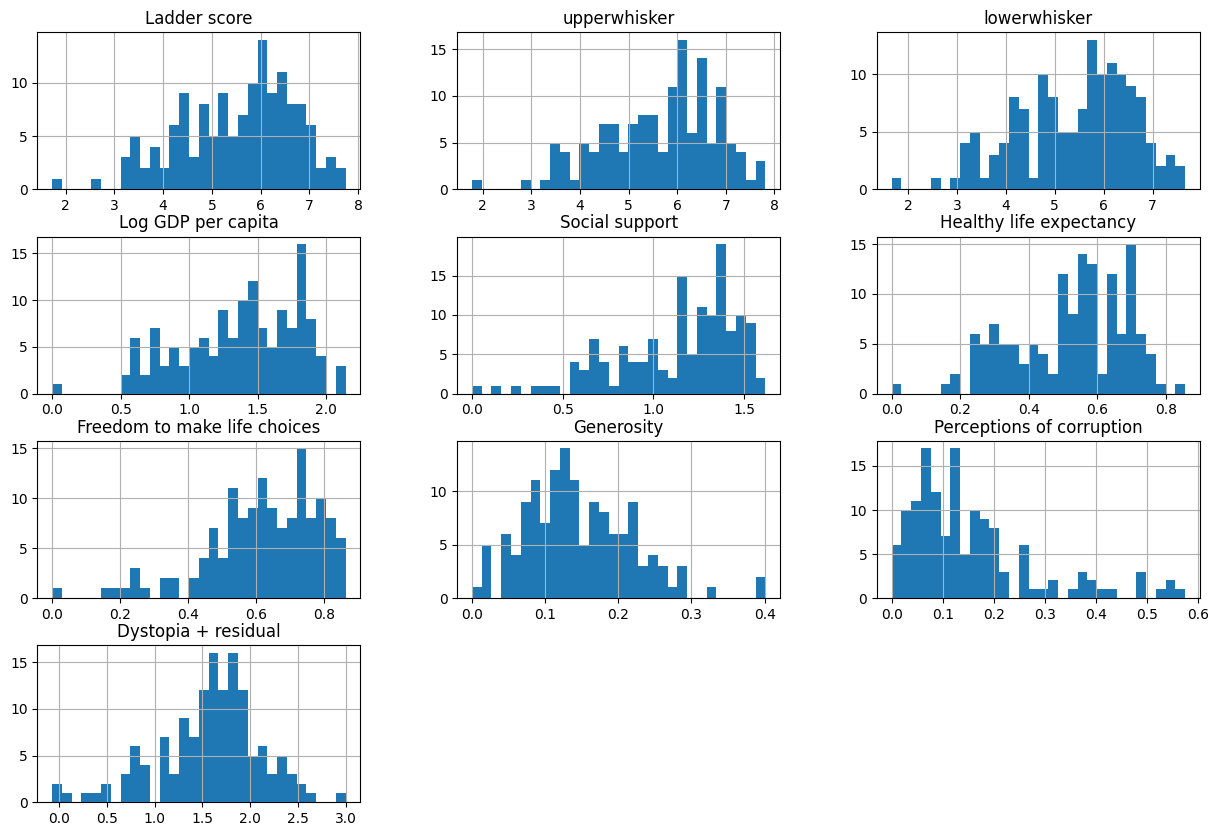

In [26]:
# Distribution of Numerical columns

print('Distribution of Numerical Features:')
df_2024.hist(figsize=(15, 10), bins=30)

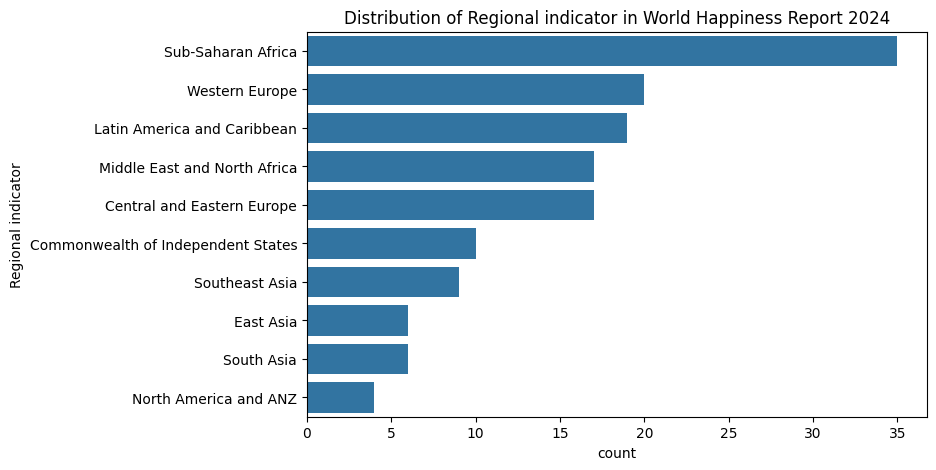

In [27]:
# Distribution of Regional indicator

plt.figure(figsize=(8,5))
order = df_2024['Regional indicator'].value_counts().index
sns.countplot(y=df_2024['Regional indicator'], order=order)
plt.title('Distribution of Regional indicator in World Happiness Report 2024')
plt.show()


In [28]:
# Regional indicator statistics
df_2024.groupby('Regional indicator')['Ladder score'].agg(['count','mean','std']).sort_values('mean', ascending=False)


,count,mean,std
Regional indicator,,,
North America and ANZ,4,6.927750,0.151476
Western Europe,20,6.841650,0.538030
Central and Eastern Europe,17,6.170941,0.494803
Latin America and Caribbean,19,6.143368,0.376936
East Asia,6,5.934333,0.398773
Southeast Asia,9,5.551889,0.779519
Commonwealth of Independent States,10,5.538500,0.480649
Middle East and North Africa,17,5.199941,1.260354
Sub-Saharan Africa,35,4.329686,0.704075


## Initial Findings

- Both datasets (2005–2023 and 2024) contain happiness scores ("Ladder score") and several explanatory variables such as GDP, social support, and health.
- The datasets differ slightly in structure:
  - 2005–2023: yearly panel data, no regional indicator included.
  - 2024: single year, includes a regional indicator, some variable definitions slightly differ (e.g., perceptions of corruption).
- Missing values are present in both datasets, especially in 2024 for health, social support, and corruption perception.
- No duplicate entries were detected.
- Key correlations (consistent across datasets):
  - Ladder score strongly correlates with Log GDP per capita, Social support, and Healthy life expectancy.
  - Perceptions of corruption correlates with ladder score, but the sign of correlation differs between 2005–2023 and 2024, likely due to different variable scaling/definitions.
  - Generosity shows weak correlation with ladder score in both datasets.
- The 2024 dataset introduces explicit regional grouping, which supports comparative regional analyses and systematic testing of regional differences.

### Preliminary Assumptions
- Economic factors (GDP), social support, and health are the strongest predictors of happiness.
- The role of corruption perception needs clarification due to potential differences in definition/scaling.
- Generosity may not be a strong explanatory factor for happiness.
- Differences in definitions across datasets must be clarified before merging or comparing results.
- The inclusion of regional indicators in 2024 opens up the possibility of analyzing systematic regional differences in happiness levels.

These initial findings motivate the next step of systematically preprocessing the datasets (handling missing values, clarifying definitions, and preparing variables) before deeper analysis and hypothesis testing.